In [108]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("/content/adult_eda-1.csv", encoding="unicode-escape")

In [9]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
#Firstly observe the relationship between education and race? What is the most educated race? and look at their salary positions?

In [14]:
df["race"].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [17]:
df["education"].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [21]:
df[df["education"] == "Bachelors"]["race"].value_counts()

White                 4682
Black                  330
Asian-Pac-Islander     289
Other                   33
Amer-Indian-Eskimo      21
Name: race, dtype: int64

In [25]:
df[df["education"] == "Bachelors"]["race"].value_counts(normalize=True) * 100

White                 87.432306
Black                  6.162465
Asian-Pac-Islander     5.396825
Other                  0.616246
Amer-Indian-Eskimo     0.392157
Name: race, dtype: float64

In [22]:
df[df["education"] == "Masters"]["race"].value_counts()

White                 1537
Asian-Pac-Islander      88
Black                   86
Other                    7
Amer-Indian-Eskimo       5
Name: race, dtype: int64

In [26]:
df[df["education"] == "Masters"]["race"].value_counts(normalize=True) * 100

White                 89.204875
Asian-Pac-Islander     5.107371
Black                  4.991294
Other                  0.406268
Amer-Indian-Eskimo     0.290192
Name: race, dtype: float64

In [23]:
df[df["education"] == "Prof-school"]["race"].value_counts()

White                 514
Asian-Pac-Islander     41
Black                  15
Other                   4
Amer-Indian-Eskimo      2
Name: race, dtype: int64

In [27]:
df[df["education"] == "Prof-school"]["race"].value_counts(normalize=True) * 100

White                 89.236111
Asian-Pac-Islander     7.118056
Black                  2.604167
Other                  0.694444
Amer-Indian-Eskimo     0.347222
Name: race, dtype: float64

In [29]:
df["race"].value_counts(normalize=True) * 100

White                 85.427352
Black                  9.594300
Asian-Pac-Islander     3.190934
Amer-Indian-Eskimo     0.955130
Other                  0.832284
Name: race, dtype: float64

In [34]:
#CALCULATION OF X
df[df["race"] == "White"]["education"].value_counts(normalize=True) * 100

HS-grad         32.010354
Some-college    22.314495
Bachelors       16.832039
Masters          5.525597
Assoc-voc        4.339229
11th             3.512367
Assoc-acdm       3.289474
10th             2.739431
7th-8th          1.988064
Prof-school      1.847857
9th              1.448806
Doctorate        1.326575
12th             1.204343
5th-6th          1.003020
1st-4th          0.481737
Preschool        0.136612
Name: education, dtype: float64

In [35]:
#CALCULATION OF ALPHA
df[df["race"] == "Asian-Pac-Islander"]["education"].value_counts(normalize=True) * 100

Bachelors       27.815207
HS-grad         21.751684
Some-college    20.019249
Masters          8.469682
Prof-school      3.946102
Assoc-voc        3.657363
Assoc-acdm       2.791145
Doctorate        2.694899
11th             2.021174
5th-6th          1.732435
10th             1.251203
7th-8th          1.058710
9th              0.866218
12th             0.866218
Preschool        0.577478
1st-4th          0.481232
Name: education, dtype: float64

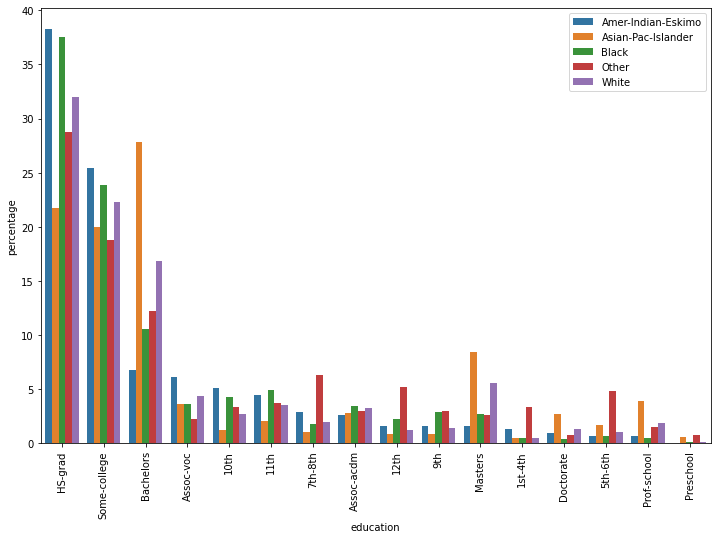

In [106]:
#VISUALIZATION OF BETA

plt.figure(figsize=(12,8))

sns.barplot(x=c["education"], y=c["percentage"], hue=c["race"])

plt.legend(loc=("upper right"))

plt.xticks(rotation=90);

In [107]:
#When we have a look at the society of the United States we see that there two majority ethnicities which are White and Black. It is important to note that 
#white people are dominant in the society in terms of population. However, at this point I have a question. Which race is the most educated race?
#Are the whites the most educated class or blacks or Asian-Pac-Islanders?. Based on the calculations and visualization above which are called X, Alpha
#Beta the most educated class is Asian-Pac-Islander.


#Now, I will try to analyze the relationship between salary end education. To understand the relationship we will look at the race classes in terms of 
#education and salary. In the beginning we will look at the most educated class of race and its salaries. After that we will analyze the most uneducated
#class of race.

In [39]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

In [40]:
df.groupby("salary")["education"].value_counts()

salary  education   
<=50K   HS-grad         8826
        Some-college    5904
        Bachelors       3134
        11th            1115
        Assoc-voc       1021
        10th             871
        Assoc-acdm       802
        Masters          764
        7th-8th          606
        9th              487
        12th             400
        5th-6th          317
        1st-4th          162
        Prof-school      153
        Doctorate        107
        Preschool         51
>50K    Bachelors       2221
        HS-grad         1675
        Some-college    1387
        Masters          959
        Prof-school      423
        Assoc-voc        361
        Doctorate        306
        Assoc-acdm       265
        10th              62
        11th              60
        7th-8th           40
        12th              33
        9th               27
        5th-6th           16
        1st-4th            6
Name: education, dtype: int64

In [42]:
df[df["race"] == "White"]["salary"].value_counts(normalize=True)

<=50K    0.74414
>50K     0.25586
Name: salary, dtype: float64

In [45]:
df[df["race"] == "White"]["salary"].value_counts()

<=50K    20699
>50K      7117
Name: salary, dtype: int64

In [43]:
df[df["race"] == "Asian-Pac-Islander"]["salary"].value_counts(normalize=True)

<=50K    0.73436
>50K     0.26564
Name: salary, dtype: float64

In [44]:
df[df["race"] == "Asian-Pac-Islander"]["salary"].value_counts()

<=50K    763
>50K     276
Name: salary, dtype: int64

In [46]:
df.groupby("salary")["race"].value_counts()

salary  race              
<=50K   White                 20699
        Black                  2737
        Asian-Pac-Islander      763
        Amer-Indian-Eskimo      275
        Other                   246
>50K    White                  7117
        Black                   387
        Asian-Pac-Islander      276
        Amer-Indian-Eskimo       36
        Other                    25
Name: race, dtype: int64

In [48]:
df.groupby("race")["salary"].value_counts(normalize=True)

race                salary
Amer-Indian-Eskimo  <=50K     0.884244
                    >50K      0.115756
Asian-Pac-Islander  <=50K     0.734360
                    >50K      0.265640
Black               <=50K     0.876120
                    >50K      0.123880
Other               <=50K     0.907749
                    >50K      0.092251
White               <=50K     0.744140
                    >50K      0.255860
Name: salary, dtype: float64

In [49]:
#Based on our calculations above, we can conclude that there is a strong positive relationship between salary and education. As the education level increases
#within a society or an ethnicity the rate of people who get paid more than 50K also increases.

In [50]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


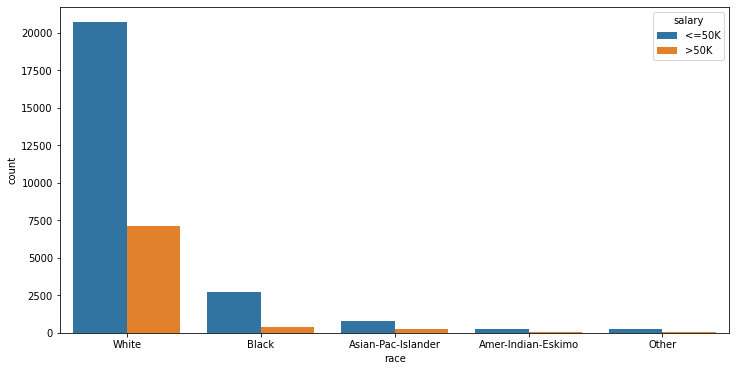

In [52]:
plt.figure(figsize=(12,6))
sns.countplot(x=df["race"], hue=df["salary"]);

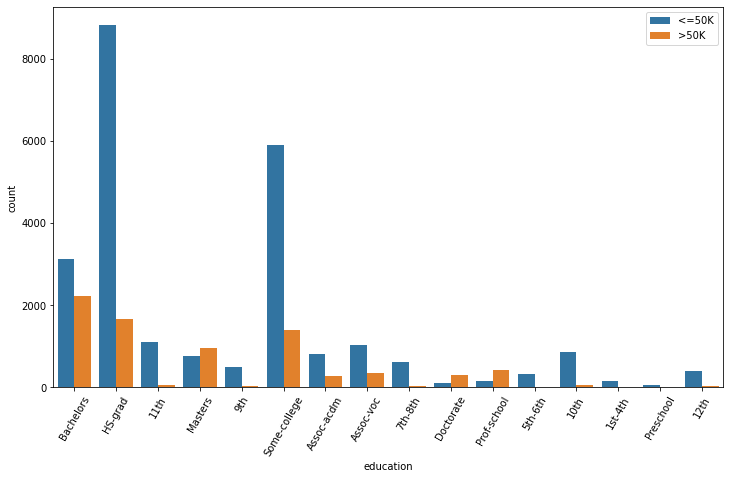

In [61]:
plt.figure(figsize=(12,7))
sns.countplot(x=df["education"], hue=df["salary"])
plt.xticks(rotation=60)

plt.legend(loc=("upper right"));

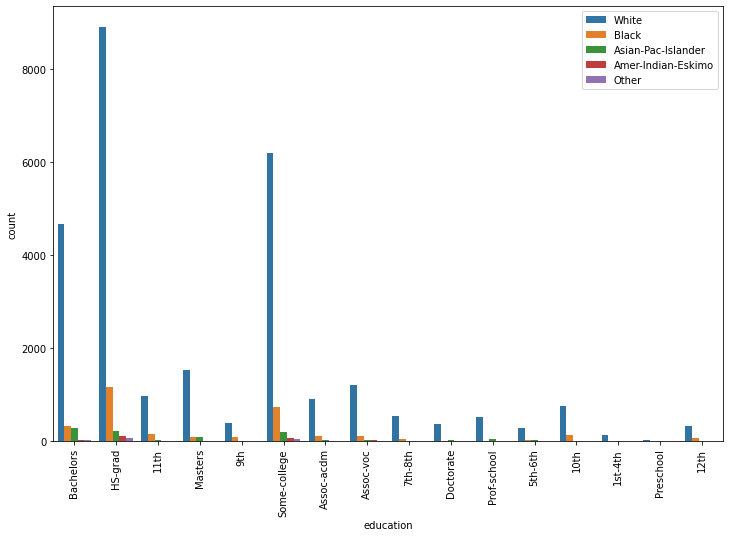

In [63]:
plt.figure(figsize=(12,8))
sns.countplot(x=df["education"], hue=df["race"])

plt.xticks(rotation=90)

plt.legend(loc=("upper right"))

plt.show()

In [85]:
a=df.groupby("race")["education"].value_counts(normalize=True) * 100
a

race                education   
Amer-Indian-Eskimo  HS-grad         38.263666
                    Some-college    25.401929
                    Bachelors        6.752412
                    Assoc-voc        6.109325
                    10th             5.144695
                                      ...    
White               Doctorate        1.326575
                    12th             1.204343
                    5th-6th          1.003020
                    1st-4th          0.481737
                    Preschool        0.136612
Name: education, Length: 79, dtype: float64

In [86]:
b=pd.DataFrame(a)
b

education
race               education              
Amer-Indian-Eskimo HS-grad       38.263666
                   Some-college  25.401929
                   Bachelors      6.752412
                   Assoc-voc      6.109325
                   10th           5.144695
...                                    ...
White              Doctorate      1.326575
                   12th           1.204343
                   5th-6th        1.003020
                   1st-4th        0.481737
                   Preschool      0.136612

[79 rows x 1 columns]

In [91]:
b.rename(columns={"race":"race","education":"education","education":"percentage"}, inplace=True)

In [97]:
c=b.reset_index()

In [98]:
c

,race,education,percentage
0,Amer-Indian-Eskimo,HS-grad,38.263666
1,Amer-Indian-Eskimo,Some-college,25.401929
2,Amer-Indian-Eskimo,Bachelors,6.752412
3,Amer-Indian-Eskimo,Assoc-voc,6.109325
4,Amer-Indian-Eskimo,10th,5.144695
...,...,...,...
74,White,Doctorate,1.326575
75,White,12th,1.204343
76,White,5th-6th,1.003020
77,White,1st-4th,0.481737
